This notebook has two examples of one iteration of backpropagation. The second example (scroll down) is the one from the lecture.



We will manually compute one iteration of forward and backward pass, which gives one parameter update. 

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# simple network
class BackpropVisualizer:
    def __init__(self):
        # Initialize the network (2 inputs, 3 hidden neurons, 1 output)
        self.W1 = np.array([[0.2, 0.3, -0.1], [0.1, -0.2, 0.3]])  # (2,3)
        self.b1 = np.array([[0.1, 0.2, 0.1]])  # (1,3)
        self.W2 = np.array([[0.2], [0.3], [-0.1]])  # (3,1)
        self.b2 = np.array([[0.1]])  # (1,1)
        
        # Example data point
        self.X = np.array([[0.5, -0.2]])  # Example input
        self.y = np.array([[0.8]])  # Target output
        
        # Learning rate
        self.learning_rate = 0.1
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward_and_backward(self):
        # Forward pass
        z1 = np.dot(self.X, self.W1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)
        
        # Loss calculation
        loss = 0.5 * (a2 - self.y)**2
 

Now we will write manually each derivative.

dz2 - The derivative of the loss with respect to the pre-activation values in the output layer (∂L/∂z₂)

(a2 - self.y) is the derivative of MSE loss with respect to the output
Multiplied by the sigmoid derivative to account for the activation function


dW2 - The derivative of the loss with respect to the weights between hidden and output layers (∂L/∂W₂)

Calculated as the dot product of hidden layer activations (transposed) and dz2
Follows from the chain rule: ∂L/∂W₂ = ∂L/∂z₂ × ∂z₂/∂W₂


db2 - The derivative of the loss with respect to the biases in the output layer (∂L/∂b₂)

Equal to dz2 because the bias directly contributes to z2 with a coefficient of 1


dz1 - The derivative of the loss with respect to the pre-activation values in the hidden layer (∂L/∂z₁)

Calculated by propagating the error from output layer (dz2) back through the weights
The multiplication by sigmoid_derivative accounts for the activation function in the hidden layer


dW1 - The derivative of the loss with respect to the weights between input and hidden layers (∂L/∂W₁)

Calculated as the dot product of input values (transposed) and dz1
Again applying the chain rule


db1 - The derivative of the loss with respect to the biases in the hidden layer (∂L/∂b₁)

Equal to dz1 for the same reason as db2


These gradients tell us how to adjust each parameter to reduce the loss function.


Next, we will visualize the values of the parameters at each stage and how they are updated.

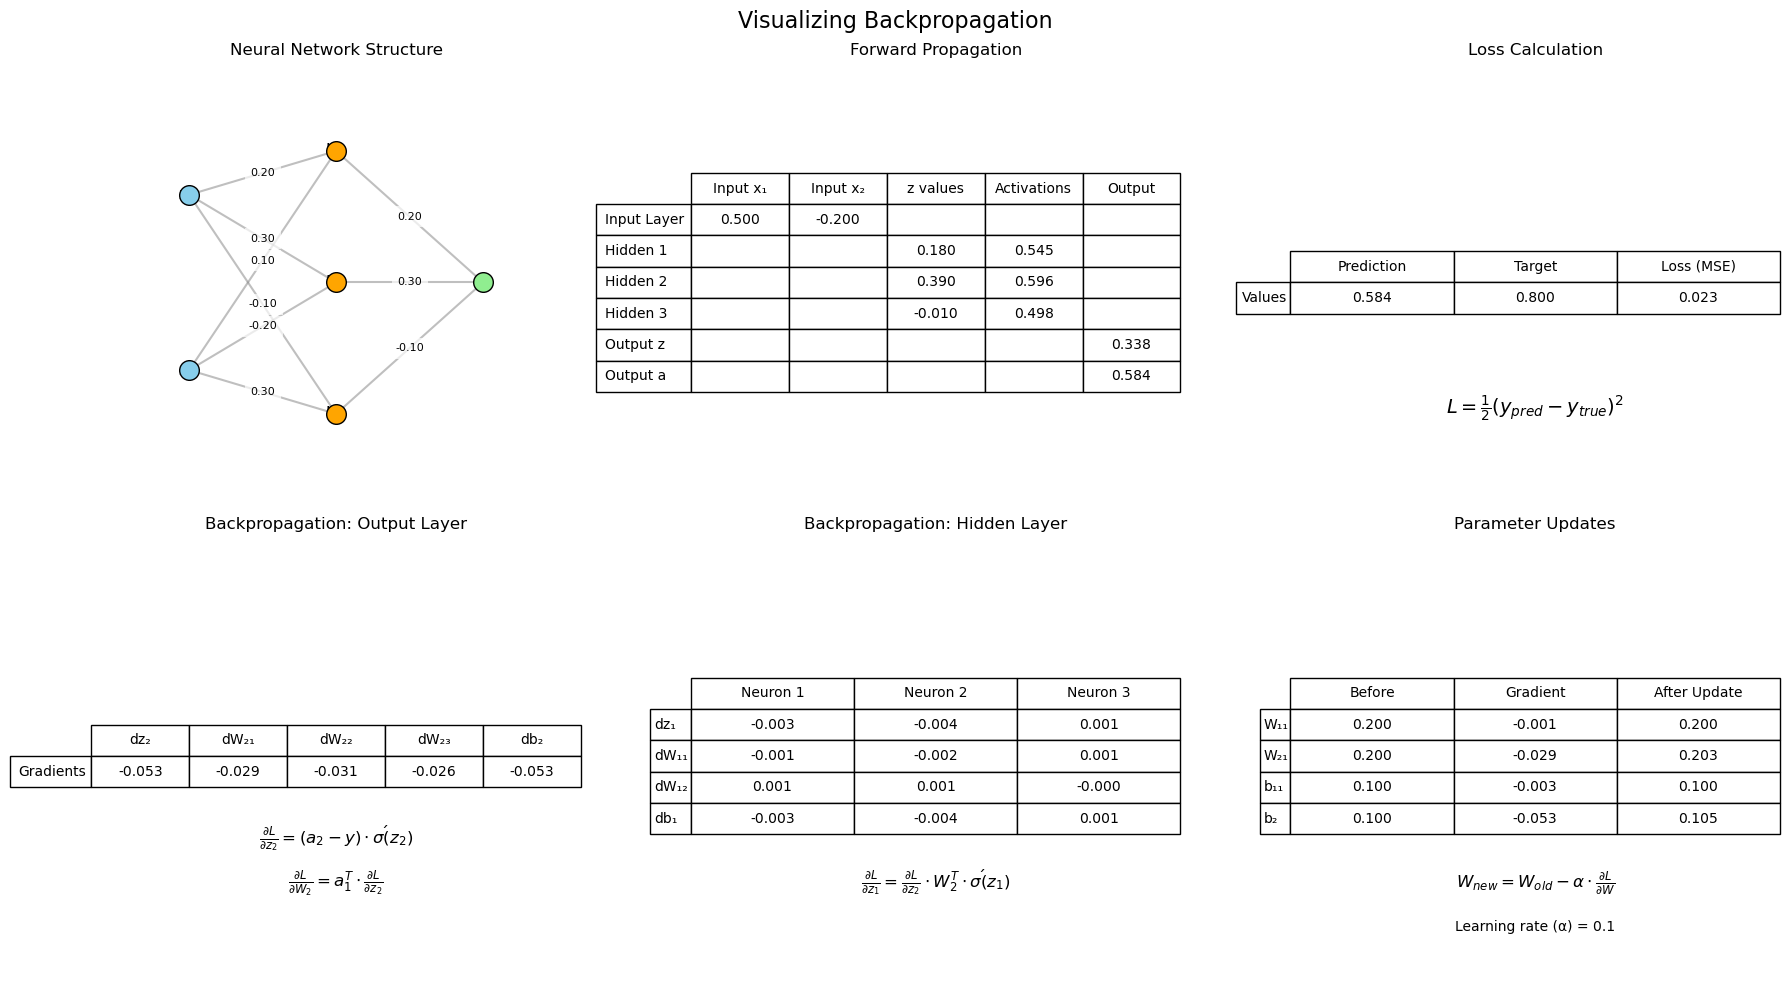

In [31]:


# Create a simple network for demonstration
class BackpropVisualizer:
    def __init__(self):
        # Initialize simple network (2 inputs, 3 hidden neurons, 1 output)
        self.W1 = np.array([[0.2, 0.3, -0.1], [0.1, -0.2, 0.3]])  # (2,3)
        self.b1 = np.array([[0.1, 0.2, 0.1]])  # (1,3)
        self.W2 = np.array([[0.2], [0.3], [-0.1]])  # (3,1)
        self.b2 = np.array([[0.1]])  # (1,1)
        
        # Example data point
        self.X = np.array([[0.5, -0.2]])  # Example input
        self.y = np.array([[0.8]])  # Target output
        
        # Learning rate
        self.learning_rate = 0.1
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivative(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))
    
    def forward_and_backward(self):
        # Forward pass
        z1 = np.dot(self.X, self.W1) + self.b1
        a1 = self.sigmoid(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        a2 = self.sigmoid(z2)
        
        # Loss calculation
        loss = 0.5 * (a2 - self.y)**2
        
        # Backward pass
        dz2 = (a2 - self.y) * self.sigmoid_derivative(z2)
        dW2 = np.dot(a1.T, dz2)
        db2 = dz2
        
        dz1 = np.dot(dz2, self.W2.T) * self.sigmoid_derivative(z1)
        dW1 = np.dot(self.X.T, dz1)
        db1 = dz1
        
        # Parameter updates
        W1_new = self.W1 - self.learning_rate * dW1
        b1_new = self.b1 - self.learning_rate * db1
        W2_new = self.W2 - self.learning_rate * dW2
        b2_new = self.b2 - self.learning_rate * db2
        
        return {
            'X': self.X, 'y': self.y,
            'z1': z1, 'a1': a1, 'z2': z2, 'a2': a2, 'loss': loss,
            'dz2': dz2, 'dW2': dW2, 'db2': db2,
            'dz1': dz1, 'dW1': dW1, 'db1': db1,
            'W1': self.W1, 'b1': self.b1, 'W2': self.W2, 'b2': self.b2,
            'W1_new': W1_new, 'b1_new': b1_new, 'W2_new': W2_new, 'b2_new': b2_new,
        }
    
    def visualize(self):
        # Get all computation values
        values = self.forward_and_backward()
        
        # Create the figure
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))
        fig.suptitle('Visualizing Backpropagation', fontsize=16)
        
        # 1. Network Structure
        ax = axes[0, 0]
        ax.set_title('Neural Network Structure')
        
        # Draw neurons
        input_neurons = [(0.2, 0.7), (0.2, 0.3)]
        hidden_neurons = [(0.5, 0.8), (0.5, 0.5), (0.5, 0.2)]
        output_neurons = [(0.8, 0.5)]
        
        # Plot neurons
        ax.scatter(*zip(*input_neurons), s=200, c='skyblue', edgecolor='black', zorder=5)
        ax.scatter(*zip(*hidden_neurons), s=200, c='orange', edgecolor='black', zorder=5)
        ax.scatter(*zip(*output_neurons), s=200, c='lightgreen', edgecolor='black', zorder=5)
        
        # Add labels
        for i, pos in enumerate(input_neurons):
            ax.text(pos[0], pos[1], f'x{i+1}', ha='center', va='center', fontsize=12)
        
        for i, pos in enumerate(hidden_neurons):
            ax.text(pos[0], pos[1], f'h{i+1}', ha='center', va='center', fontsize=12)
        
        ax.text(output_neurons[0][0], output_neurons[0][1], 'y', ha='center', va='center', fontsize=12)
        
        # Draw connections
        for i, input_pos in enumerate(input_neurons):
            for j, hidden_pos in enumerate(hidden_neurons):
                ax.plot([input_pos[0], hidden_pos[0]], [input_pos[1], hidden_pos[1]], 'gray', 
                        alpha=0.5, zorder=1)
                # Show weights
                mid_x = (input_pos[0] + hidden_pos[0]) / 2
                mid_y = (input_pos[1] + hidden_pos[1]) / 2
                ax.text(mid_x, mid_y, f'{values["W1"][i,j]:.2f}', 
                       fontsize=8, ha='center', va='center', 
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
                
        for i, hidden_pos in enumerate(hidden_neurons):
            for j, output_pos in enumerate(output_neurons):
                ax.plot([hidden_pos[0], output_pos[0]], [hidden_pos[1], output_pos[1]], 'gray',
                       alpha=0.5, zorder=1)
                # Show weights
                mid_x = (hidden_pos[0] + output_pos[0]) / 2
                mid_y = (hidden_pos[1] + output_pos[1]) / 2
                ax.text(mid_x, mid_y, f'{values["W2"][i,j]:.2f}', 
                       fontsize=8, ha='center', va='center',
                       bbox=dict(facecolor='white', alpha=0.7, edgecolor='none'))
                
        ax.set_xlim(0, 1)
        ax.set_ylim(0, 1)
        ax.set_axis_off()
        
        # 2. Forward Propagation
        ax = axes[0, 1]
        ax.set_title('Forward Propagation')
        
        # Create a table to show forward pass calculations
        cell_text = [
            [f'{values["X"][0,0]:.3f}', f'{values["X"][0,1]:.3f}', '', '', ''],
            ['', '', f'{values["z1"][0,0]:.3f}', f'{values["a1"][0,0]:.3f}', ''],
            ['', '', f'{values["z1"][0,1]:.3f}', f'{values["a1"][0,1]:.3f}', ''],
            ['', '', f'{values["z1"][0,2]:.3f}', f'{values["a1"][0,2]:.3f}', ''],
            ['', '', '', '', f'{values["z2"][0,0]:.3f}'],
            ['', '', '', '', f'{values["a2"][0,0]:.3f}'],
        ]
        
        col_labels = ['Input x₁', 'Input x₂', 'z values', 'Activations', 'Output']
        row_labels = ['Input Layer', 'Hidden 1', 'Hidden 2', 'Hidden 3', 'Output z', 'Output a']
        
        table = ax.table(cellText=cell_text, rowLabels=row_labels, colLabels=col_labels,
                        loc='center', cellLoc='center')
        table.auto_set_font_size(False)
        table.set_fontsize(10)
        table.scale(1, 1.5)
        ax.set_axis_off()
        
        # 3. Loss Calculation
        ax = axes[0, 2]
        ax.set_title('Loss Calculation')
        
        # Create a table for loss
        loss_cell_text = [
            [f'{values["a2"][0,0]:.3f}', f'{values["y"][0,0]:.3f}', f'{values["loss"][0,0]:.3f}']
        ]
        
        loss_col_labels = ['Prediction', 'Target', 'Loss (MSE)']
        loss_row_labels = ['Values']
        
        loss_table = ax.table(cellText=loss_cell_text, rowLabels=loss_row_labels, 
                            colLabels=loss_col_labels, loc='center', cellLoc='center')
        loss_table.auto_set_font_size(False)
        loss_table.set_fontsize(10)
        loss_table.scale(1, 1.5)
        
        # Add loss formula
        formula = r'$L = \frac{1}{2}(y_{pred} - y_{true})^2$'
        ax.text(0.5, 0.2, formula, fontsize=14, ha='center')
        
        ax.set_axis_off()
        
        # 4. Backward Propagation (Output Layer)
        ax = axes[1, 0]
        ax.set_title('Backpropagation: Output Layer')
        
        # Create a table for output layer gradients
        out_grad_cell_text = [
            [f'{values["dz2"][0,0]:.3f}', f'{values["dW2"][0,0]:.3f}', f'{values["dW2"][1,0]:.3f}', 
             f'{values["dW2"][2,0]:.3f}', f'{values["db2"][0,0]:.3f}']
        ]
        
        out_grad_col_labels = ['dz₂', 'dW₂₁', 'dW₂₂', 'dW₂₃', 'db₂']
        out_grad_row_labels = ['Gradients']
        
        out_grad_table = ax.table(cellText=out_grad_cell_text, rowLabels=out_grad_row_labels,
                                colLabels=out_grad_col_labels, loc='center', cellLoc='center')
        out_grad_table.auto_set_font_size(False)
        out_grad_table.set_fontsize(10)
        out_grad_table.scale(1, 1.5)
        
        # Add gradient formula
        formula = r'$\frac{\partial L}{\partial z_2} = (a_2 - y) \cdot \sigma\'(z_2)$'
        ax.text(0.5, 0.3, formula, fontsize=12, ha='center')
        formula = r'$\frac{\partial L}{\partial W_2} = a_1^T \cdot \frac{\partial L}{\partial z_2}$'
        ax.text(0.5, 0.2, formula, fontsize=12, ha='center')
        
        ax.set_axis_off()
        
        # 5. Backward Propagation (Hidden Layer)
        ax = axes[1, 1]
        ax.set_title('Backpropagation: Hidden Layer')
        
        # Create a table for hidden layer gradients (partial)
        hidden_grad_cell_text = [
            [f'{values["dz1"][0,0]:.3f}', f'{values["dz1"][0,1]:.3f}', f'{values["dz1"][0,2]:.3f}'],
            [f'{values["dW1"][0,0]:.3f}', f'{values["dW1"][0,1]:.3f}', f'{values["dW1"][0,2]:.3f}'],
            [f'{values["dW1"][1,0]:.3f}', f'{values["dW1"][1,1]:.3f}', f'{values["dW1"][1,2]:.3f}'],
            [f'{values["db1"][0,0]:.3f}', f'{values["db1"][0,1]:.3f}', f'{values["db1"][0,2]:.3f}']
        ]
        
        hidden_grad_col_labels = ['Neuron 1', 'Neuron 2', 'Neuron 3']
        hidden_grad_row_labels = ['dz₁', 'dW₁₁', 'dW₁₂', 'db₁']
        
        hidden_grad_table = ax.table(cellText=hidden_grad_cell_text, rowLabels=hidden_grad_row_labels,
                                    colLabels=hidden_grad_col_labels, loc='center', cellLoc='center')
        hidden_grad_table.auto_set_font_size(False)
        hidden_grad_table.set_fontsize(10)
        hidden_grad_table.scale(1, 1.5)
        
        # Add gradient formula
        formula = r'$\frac{\partial L}{\partial z_1} = \frac{\partial L}{\partial z_2} \cdot W_2^T \cdot \sigma\'(z_1)$'
        ax.text(0.5, 0.2, formula, fontsize=12, ha='center')
        
        ax.set_axis_off()
        
        # 6. Parameter Updates
        ax = axes[1, 2]
        ax.set_title('Parameter Updates')
        
        # Create a simplified table showing a few weight updates
        update_cell_text = [
            [f'{values["W1"][0,0]:.3f}', f'{values["dW1"][0,0]:.3f}', f'{values["W1_new"][0,0]:.3f}'],
            [f'{values["W2"][0,0]:.3f}', f'{values["dW2"][0,0]:.3f}', f'{values["W2_new"][0,0]:.3f}'],
            [f'{values["b1"][0,0]:.3f}', f'{values["db1"][0,0]:.3f}', f'{values["b1_new"][0,0]:.3f}'],
            [f'{values["b2"][0,0]:.3f}', f'{values["db2"][0,0]:.3f}', f'{values["b2_new"][0,0]:.3f}']
        ]
        
        update_col_labels = ['Before', 'Gradient', 'After Update']
        update_row_labels = ['W₁₁', 'W₂₁', 'b₁₁', 'b₂']
        
        update_table = ax.table(cellText=update_cell_text, rowLabels=update_row_labels,
                              colLabels=update_col_labels, loc='center', cellLoc='center')
        update_table.auto_set_font_size(False)
        update_table.set_fontsize(10)
        update_table.scale(1, 1.5)
        
        # Add update formula
        formula = r'$W_{new} = W_{old} - \alpha \cdot \frac{\partial L}{\partial W}$'
        ax.text(0.5, 0.2, formula, fontsize=12, ha='center')
        ax.text(0.5, 0.1, f'Learning rate (α) = {self.learning_rate}', fontsize=10, ha='center')
        
        ax.set_axis_off()
        
        plt.tight_layout()
        plt.show()

# Create and show the visualization
vis = BackpropVisualizer()
vis.visualize()

We will now do the calculation for the NN provided in the slides, with a learning rate of 0.1.

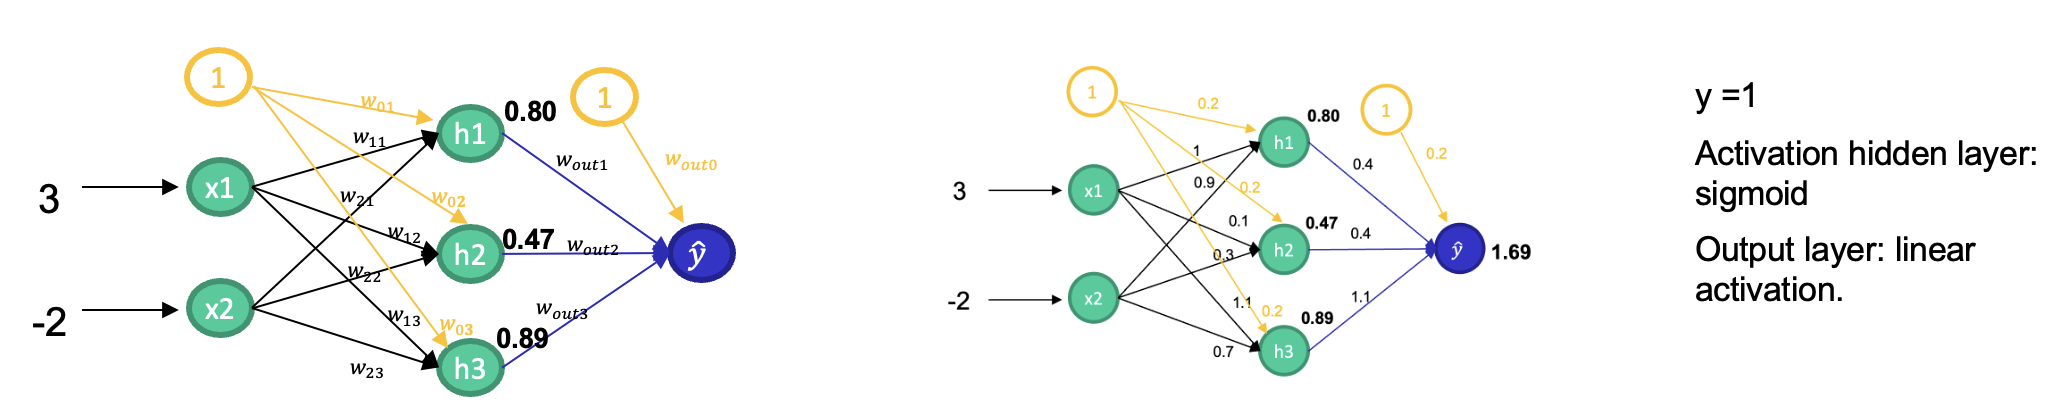

We start with the calculation of the forward pass.


In [32]:
import numpy as np

# Define the sigmoid activation function and its derivative
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def sigmoid_derivative(sigmoid_output):
    return sigmoid_output * (1 - sigmoid_output)

# Network parameters from diagram
x1 = 3
x2 = -2
y_true = 1
bias = 0.2

# Input to hidden layer weights
w_11 = 1
w_12 = 0.1
w_13 = 1.1
w_21 = 0.9
w_22 = 0.3
w_23 = 0.7

# Hidden to output layer weights
w_out1 = 0.4
w_out2 = 0.4
w_out3 = 1.1

# Learning rate
learning_rate = 0.1

# FORWARD PASS

# Calculate input to hidden layer nodes
z_h1 = x1 * w_11 + x2 * w_21 + bias
z_h2 = x1 * w_12 + x2 * w_22 + bias
z_h3 = x1 * w_13 + x2 * w_23 + bias

# Apply sigmoid activation to hidden layer
h1 = sigmoid(z_h1)
h2 = sigmoid(z_h2)
h3 = sigmoid(z_h3)

# Calculate output (with linear activation)
# All nodes use the same bias value (0.2) as stated in the problem
bias_out = bias
z_y = h1 * w_h1_y + h2 * w_h2_y + h3 * w_h3_y + bias_out
y_pred = z_y  # Linear activation function (identity)

# Loss calculation (Squared Error)
loss = (y_pred - y_true)**2

print("FORWARD PASS:")
print(f"Hidden layer inputs:")
print(f"z_h1 = {z_h1:.4f}")
print(f"z_h2 = {z_h2:.4f}")
print(f"z_h3 = {z_h3:.4f}")

print(f"\nHidden layer outputs after sigmoid:")
print(f"h1 = {h1:.4f}")
print(f"h2 = {h2:.4f}")
print(f"h3 = {h3:.4f}")

print(f"\nOutput layer:")
print(f"z_y = y_pred = {y_pred:.4f}")
print(f"True value: y = {y_true}")
print(f"Loss = {loss:.4f}")

FORWARD PASS:
Hidden layer inputs:
z_h1 = 1.4000
z_h2 = -0.1000
z_h3 = 2.1000

Hidden layer outputs after sigmoid:
h1 = 0.8022
h2 = 0.4750
h3 = 0.8909

Output layer:
z_y = y_pred = 1.6909
True value: y = 1
Loss = 0.4773


Now we will claculate the backward pass. For this we need to get all the gradients until reaching the inputs, and then we have to calculate the update to all weights using a learning rate of 0.1. The indices show the flow of computation as it happens in the forward pass (so, grad_w_h1_y means gradient of the wight between the hidden layer h1 and the output layer y (this would be w_out1 in the image)

In [33]:
# BACKWARD PASS

# Step 1: Calculate output layer error gradient (∂E/∂ŷ)
dE_dy = 2 * (y_pred - y_true)
print("\nBACKWARD PASS:")
print(f"Output layer error gradient (∂E/∂ŷ) = {dE_dy:.4f}")

# Step 2: Calculate gradients for weights between hidden and output layer
# For the weights: ∂E/∂w_h_y = ∂E/∂ŷ * h
grad_w_out1 = dE_dy * h1
grad_w_out2 = dE_dy * h2
grad_w_out3 = dE_dy * h3
grad_bias_out = dE_dy * 1  # For bias, input is always 1

print(f"\nGradients for hidden-to-output weights:")
print(f"∂E/∂w_out1 = {grad_w_out1:.4f}")
print(f"∂E/∂w_out2 = {grad_w_out2:.4f}")
print(f"∂E/∂w_out3 = {grad_w_out3:.4f}")
print(f"∂E/∂bias_out = {grad_bias_out:.4f}")

# Step 3: Calculate hidden layer errors (δ_hidden)
# For each hidden node: δ_h = ∂E/∂ŷ * w_h_y * sigmoid_derivative(h)
delta_h1 = dE_dy * w_out1 * sigmoid_derivative(h1)
delta_h2 = dE_dy * w_out2 * sigmoid_derivative(h2)
delta_h3 = dE_dy * w_out3 * sigmoid_derivative(h3)

print(f"\nHidden layer errors:")
print(f"δ_h1 = {delta_h1:.4f}")
print(f"δ_h2 = {delta_h2:.4f}")
print(f"δ_h3 = {delta_h3:.4f}")

# Step 4: Calculate gradients for weights from input to hidden layer
# For each weight: ∂E/∂w_x_h = δ_h * x
grad_w_11 = delta_h1 * x1
grad_w_12 = delta_h2 * x1
grad_w_13 = delta_h3 * x1
grad_w_21 = delta_h1 * x2
grad_w_22 = delta_h2 * x2
grad_w_23 = delta_h3 * x2

# For biases: ∂E/∂bias_h = δ_h * 1
grad_bias_h1 = delta_h1 * 1
grad_bias_h2 = delta_h2 * 1
grad_bias_h3 = delta_h3 * 1

print(f"\nGradients for input-to-hidden weights:")
print(f"∂E/∂w_11 = {grad_w_11:.4f}")
print(f"∂E/∂w_12 = {grad_w_12:.4f}")
print(f"∂E/∂w_13 = {grad_w_13:.4f}")
print(f"∂E/∂w_21 = {grad_w_21:.4f}")
print(f"∂E/∂w_22 = {grad_w_22:.4f}")
print(f"∂E/∂w_23 = {grad_w_23:.4f}")

print(f"\nGradients for hidden layer biases:")
print(f"∂E/∂bias_h1 = {grad_bias_h1:.4f}")
print(f"∂E/∂bias_h2 = {grad_bias_h2:.4f}")
print(f"∂E/∂bias_h3 = {grad_bias_h3:.4f}")

# Step 5: Update all weights and biases
# Update weights between hidden and output layer
new_w_out1 = w_out1 - learning_rate * grad_w_out1
new_w_out2 = w_out1 - learning_rate * grad_w_out2
new_w_out3 = w_out3 - learning_rate * grad_w_out3
new_bias_out = bias - learning_rate * grad_bias_out

# Update weights between input and hidden layer
new_w_11 = w_11 - learning_rate * grad_w_11
new_w_12 = w_12 - learning_rate * grad_w_12
new_w_13 = w_13 - learning_rate * grad_w_13
new_w_21 = w_21 - learning_rate * grad_w_21
new_w_22 = w_22 - learning_rate * grad_w_22
new_w_23 = w_23 - learning_rate * grad_w_23

# Update hidden layer biases
new_bias_h1 = bias - learning_rate * grad_bias_h1
new_bias_h2 = bias - learning_rate * grad_bias_h2
new_bias_h3 = bias - learning_rate * grad_bias_h3
new_bias_out = bias_out - learning_rate * grad_bias_out

print(f"\nUPDATED WEIGHTS AND BIASES (with learning rate = {learning_rate}):")
print("\nHidden-to-output weights:")
print(f"w_out1: {w_out1:.4f} → {new_w_out1:.4f}")
print(f"w_out2: {w_out2:.4f} → {new_w_out2:.4f}")
print(f"w_out3: {w_out3:.4f} → {new_w_out3:.4f}")
print(f"bias_out: {bias_out:.4f} → {new_bias_out:.4f}")

print("\nInput-to-hidden weights:")
print(f"w_x11: {w_11:.4f} → {new_w_11:.4f}")
print(f"w_12: {w_12:.4f} → {new_w_12:.4f}")
print(f"w_13: {w_13:.4f} → {new_w_13:.4f}")
print(f"w_21: {w_21:.4f} → {new_w_21:.4f}")
print(f"w_22: {w_22:.4f} → {new_w_22:.4f}")
print(f"w_23: {w_23:.4f} → {new_w_23:.4f}")

print("\nHidden layer biases:")
print(f"bias_h1: {bias:.4f} → {new_bias_h1:.4f}")
print(f"bias_h2: {bias:.4f} → {new_bias_h2:.4f}")
print(f"bias_h3: {bias:.4f} → {new_bias_h3:.4f}")



BACKWARD PASS:
Output layer error gradient (∂E/∂ŷ) = 1.3818

Gradients for hidden-to-output weights:
∂E/∂w_out1 = 1.1084
∂E/∂w_out2 = 0.6564
∂E/∂w_out3 = 1.2310
∂E/∂bias_out = 1.3818

Hidden layer errors:
δ_h1 = 0.0877
δ_h2 = 0.1378
δ_h3 = 0.1477

Gradients for input-to-hidden weights:
∂E/∂w_11 = 0.2631
∂E/∂w_12 = 0.4135
∂E/∂w_13 = 0.4432
∂E/∂w_21 = -0.1754
∂E/∂w_22 = -0.2757
∂E/∂w_23 = -0.2955

Gradients for hidden layer biases:
∂E/∂bias_h1 = 0.0877
∂E/∂bias_h2 = 0.1378
∂E/∂bias_h3 = 0.1477

UPDATED WEIGHTS AND BIASES (with learning rate = 0.1):

Hidden-to-output weights:
w_out1: 0.4000 → 0.2892
w_out2: 0.4000 → 0.3344
w_out3: 1.1000 → 0.9769
bias_out: 0.2000 → 0.0618

Input-to-hidden weights:
w_x11: 1.0000 → 0.9737
w_12: 0.1000 → 0.0587
w_13: 1.1000 → 1.0557
w_21: 0.9000 → 0.9175
w_22: 0.3000 → 0.3276
w_23: 0.7000 → 0.7295

Hidden layer biases:
bias_h1: 0.2000 → 0.1912
bias_h2: 0.2000 → 0.1862
bias_h3: 0.2000 → 0.1852
